# Code examples (week 1)

Topics:
* Gradient descent (a.k.a. steepest descent)
* Linear regression via the normal equations
* Linear regression via stochastic gradient descent
* Polynomial regression with the scikit-learn package
* Regularized regression

Minimize the function $f(\theta_0,\theta_1) = 4 \theta_0^2 - 4 \theta_0 \theta_1 + 3 \theta_1^2$ using steepest descent.

The gradient of $f$ is $\nabla f(\theta) = (8 \theta_0 - 4 \theta_1, -4 \theta_0 + 6 \theta_1)$.

In [4]:
import numpy as np

np.set_printoptions(suppress=True, precision=4)

alpha = 0.1 # Step length (may need to adjust)
maxiter = 20

dt = np.zeros(2) # Define a vector with 2 elements to hold the gradient
t = np.array([1,1]) # Starting point

for iter in range(0,maxiter):
    # Gradient
    dt[0] = 8*t[0] - 4*t[1]
    dt[1] = -4*t[0] + 6*t[1]
    
    # Updating step
    t = t - alpha*dt
    print(t)

[0.6 0.8]
[0.44 0.56]
[0.312 0.4  ]
[0.2224 0.2848]
[0.1584 0.2029]
[0.1128 0.1445]
[0.0804 0.1029]
[0.0572 0.0733]
[0.0408 0.0522]
[0.029  0.0372]
[0.0207 0.0265]
[0.0147 0.0189]
[0.0105 0.0134]
[0.0075 0.0096]
[0.0053 0.0068]
[0.0038 0.0049]
[0.0027 0.0035]
[0.0019 0.0025]
[0.0014 0.0018]
[0.001  0.0013]


### Linear regression 

This example shows how to read a small dataset from a text file (in csv format) and perform simple visualization using matplotlib.

There are many ways to load data from files in Python, e.g. csvReader and Pandas. Here we use numpy.genfromtxt which is fairly basic but can often be used to get the job done.

(100, 2)


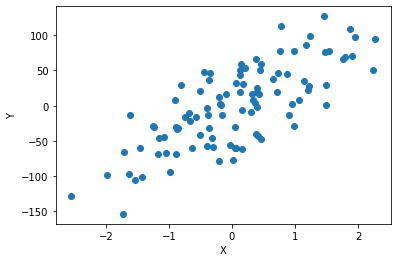

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data=np.genfromtxt('Code examples (15_1)/data/linear_reg.csv', delimiter=',', skip_header=1) # Columns: x, y
print(data.shape) # Sanity check
n=data.shape[0]

# Construct data matrix for linear regression
# Model: y= θ_0 + θ_1*x_1 + ... + θ_p*x_p
y=data[:,-1] # Output variable is in the last column in this file

# Insert a column of ones (intercept term)
X=np.c_[np.ones(n), data[:,0:-1]] # Include all columns from 'data' except the last

# Plot the data
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
# Obtain the regression coefficients by solving the "normal equations", X'Xθ = X'y, directly
# This is the traditional way of solving least squares problems ("exact" solution)
theta_ex = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print('Exact solution: theta=', theta_ex)

Exact solution: theta= [-2.8497 43.2041]


### Stochastic gradient descent (SGD)
This example shows how the SGD algorithm can be used to find solutions to linear least squares problems.

NB This is a very primitive implementation of SGD.

In [15]:
# SGD

alpha=0.1  # May have to be decreased
maxiter=10  # May have to be increased

p=X.shape[1]
theta=np.zeros(p)
for iter in range(0,maxiter):
    i = np.random.randint(n) # Select one training example uniformly at random
    error = np.dot(theta,X[i,:]) - y[i]
    for j in range(0,p):
        theta[j] = theta[j] - alpha*error*X[i,j]
print('SGD approximation:', theta)

SGD approximation: [12.392  36.3599]
